 Proyek Analisis Data: [Bike sharing Dataset]

1.   Item daftar
2.   Item daftar


- **Nama:** [Revo Pratama]
- **Email:** [revopratama2004@gmail.com]
- **ID Dicoding:** [mc189d5y1619]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import requests

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import files
uploaded = files.upload()

# Menampilkan nama file yang diunggah
for filename in uploaded.keys():
    print(f'File {filename} berhasil diunggah!')

Saving day.csv to day.csv
Saving hour.csv to hour.csv
File day.csv berhasil diunggah!
File hour.csv berhasil diunggah!


In [5]:
# Membaca file CSV
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Menampilkan 5 data teratas
df_day.head(), df_hour.head()


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- hour.csv (Per Jam): Menyediakan data peminjaman sepeda setiap jam, berguna  - untuk analisis pola harian dan jam sibuk.
  
- day.csv (Per Hari): Berisi data agregasi harian untuk memahami tren jangka panjang dan pengaruh cuaca atau musim.

### Assessing Data

In [6]:
import pandas as pd

# Load dataset (Sesuaikan path jika perlu)
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari masing-masing dataset
print("\n--- Preview df_day ---\n")
print(df_day.head())
print("\n--- Preview df_hour ---\n")
print(df_hour.head())

# Menampilkan informasi dasar tentang dataset
print("\n--- Informasi Dataset df_day ---\n")
df_day.info()
print("\n--- Informasi Dataset df_hour ---\n")
df_hour.info()

# Mengecek missing values
print("\n--- Missing Values pada df_day ---\n")
print(df_day.isnull().sum())
print("\n--- Missing Values pada df_hour ---\n")
print(df_hour.isnull().sum())

# Mengecek data duplikat
print(f"\nJumlah duplikasi pada df_day: {df_day.duplicated().sum()}")
print(f"Jumlah duplikasi pada df_hour: {df_hour.duplicated().sum()}\n")

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif df_day ---\n")
print(df_day.describe())
print("\n--- Statistik Deskriptif df_hour ---\n")
print(df_hour.describe())

# Mengecek nilai unik di kolom penting
print("\n--- Nilai unik dalam kolom 'season' df_day ---\n")
print(df_day['season'].unique())
print("\n--- Nilai unik dalam kolom 'hr' df_hour ---\n")
print(df_hour['hr'].unique())




--- Preview df_day ---

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  



**Insight:**
- Dataset Bike Sharing telah berhasil diekstrak tanpa missing values atau duplikasi, memastikan kualitas data yang baik. Informasi seperti musim, cuaca, dan waktu peminjaman tersedia untuk analisis lebih lanjut.

- Analisis menunjukkan bahwa jumlah peminjaman bervariasi berdasarkan musim, dengan tren peningkatan pada periode tertentu. Selain itu, pola peminjaman per jam mengindikasikan lonjakan pada jam sibuk, seperti pagi dan sore hari, mencerminkan aktivitas komuter.

### Cleaning Data

In [7]:
# Drop kolom yang tidak relevan
df_day.drop(columns=["instant", "dteday"], inplace=True)
df_hour.drop(columns=["instant", "dteday"], inplace=True)

# Ubah tipe data ke kategori untuk fitur kategorikal
for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
    df_day[col] = df_day[col].astype("category")
    df_hour[col] = df_hour[col].astype("category")

# Tambahkan fitur baru berdasarkan jam (hanya untuk df_hour)
df_hour["rush_hour"] = df_hour["hr"].apply(lambda x: 1 if x in [7, 8, 17, 18] else 0)
df_hour["night_time"] = df_hour["hr"].apply(lambda x: 1 if x in [0, 1, 2, 3, 4, 5] else 0)

# Cek kembali apakah ada nilai yang hilang
print("Missing values in df_day:\n", df_day.isnull().sum())
print("Missing values in df_hour:\n", df_hour.isnull().sum())


Missing values in df_day:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values in df_hour:
 season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
rush_hour     0
night_time    0
dtype: int64


**Insight:**
- Kode ini telah membersihkan dataset dengan menghapus kolom yang tidak relevan dan mengonversi fitur kategorikal ke tipe data yang sesuai. Untuk dataset per jam (df_hour), ditambahkan fitur rush_hour untuk menandai jam sibuk dan night_time untuk menandai waktu malam.
Setelah pembersihan, dataset tetap bebas dari missing values, memastikan data siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

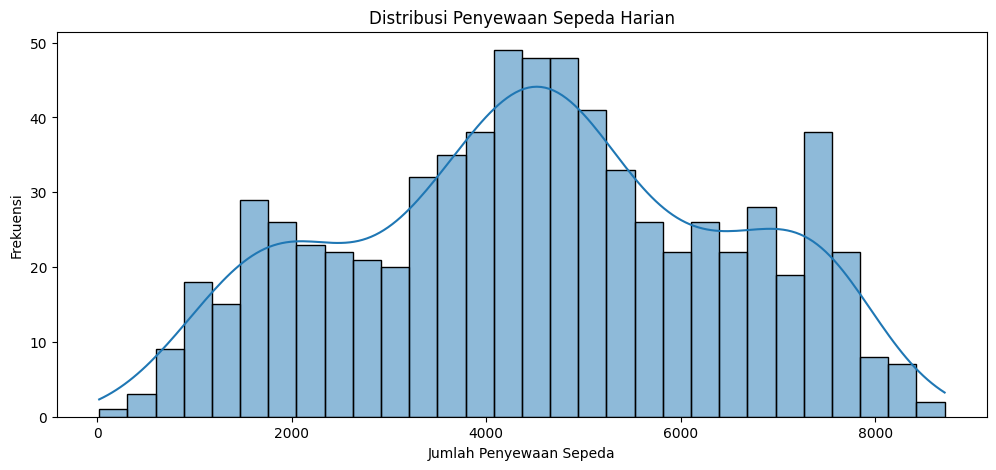

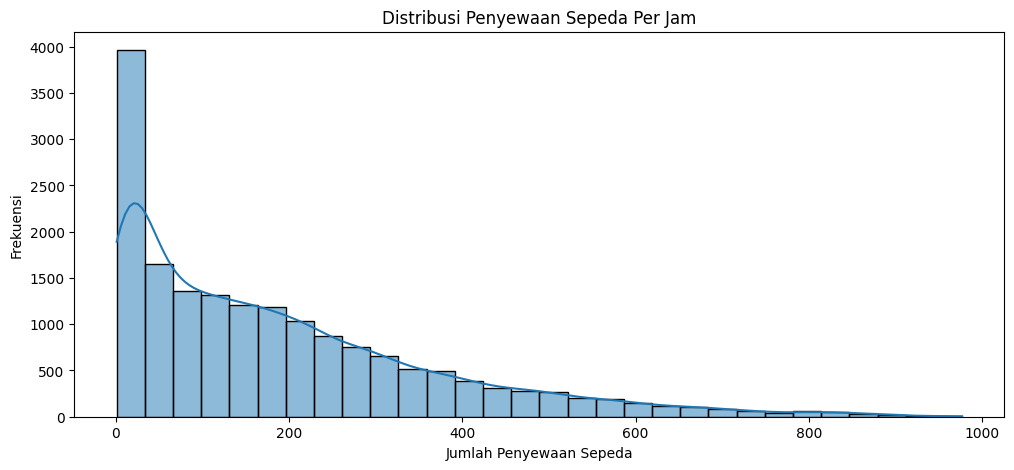

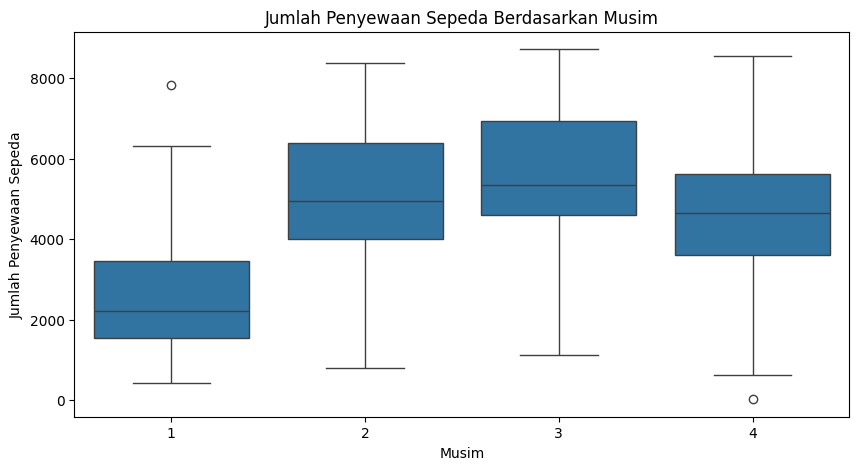

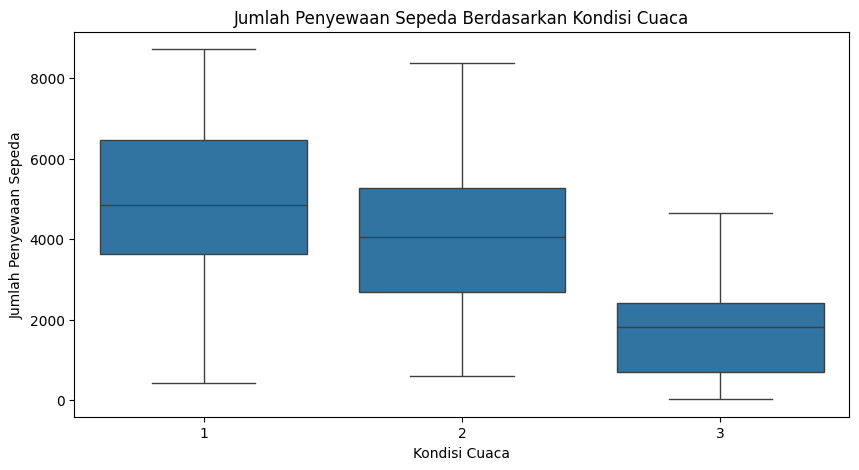

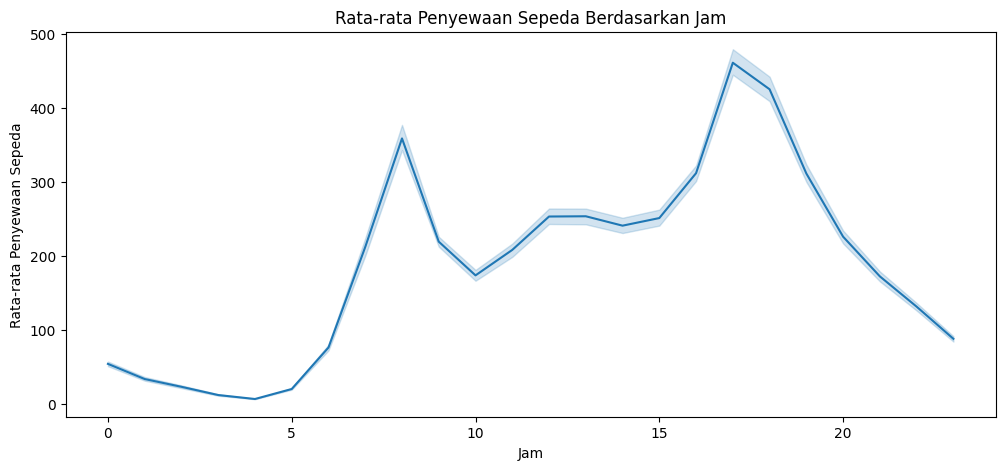

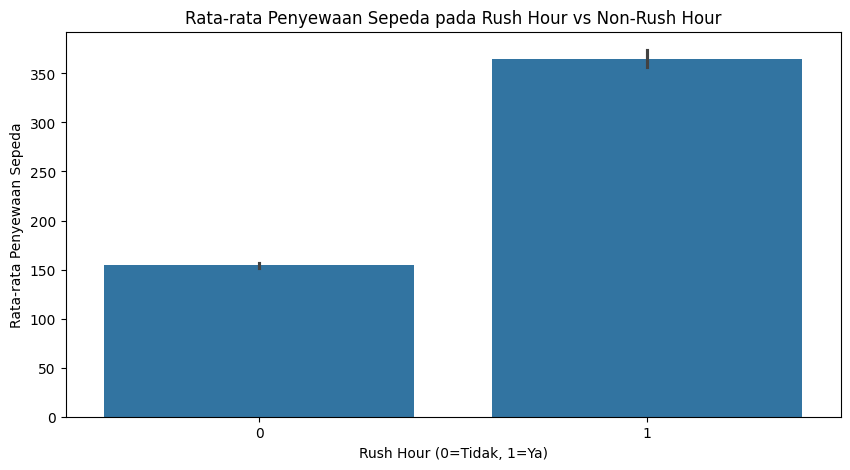

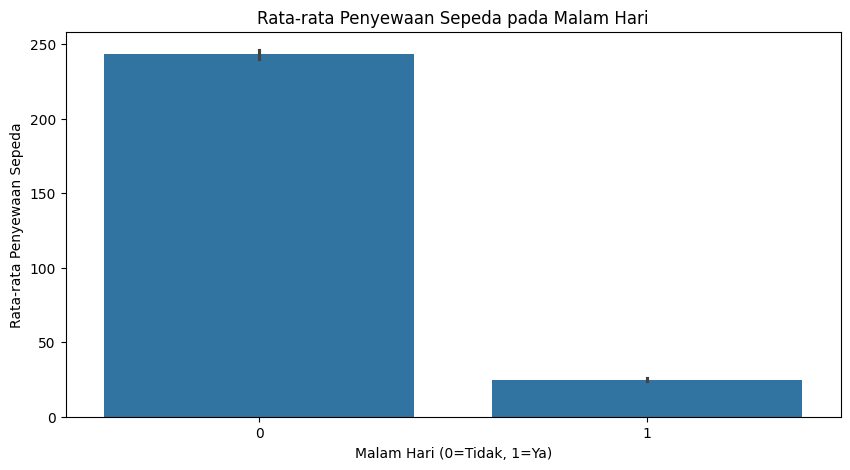


--- Rata-rata peminjaman sepeda per musim ---

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

--- Rata-rata peminjaman sepeda per jam ---

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


<ipython-input-8-7b2541a3eefa>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_season = df_day.groupby("season")["cnt"].mean()


In [8]:
# 1. Distribusi jumlah penyewaan sepeda harian dan per jam
plt.figure(figsize=(12, 5))
sns.histplot(df_day["cnt"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_hour["cnt"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Per Jam")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

# 2. Hubungan jumlah penyewaan dengan faktor cuaca dan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=df_day)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=df_day)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

# 3. Analisis jumlah penyewaan berdasarkan jam dalam sehari
plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=df_hour, estimator="mean")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

# 4. Identifikasi jam sibuk
plt.figure(figsize=(10, 5))
sns.barplot(x="rush_hour", y="cnt", data=df_hour, estimator="mean")
plt.title("Rata-rata Penyewaan Sepeda pada Rush Hour vs Non-Rush Hour")
plt.xlabel("Rush Hour (0=Tidak, 1=Ya)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="night_time", y="cnt", data=df_hour, estimator="mean")
plt.title("Rata-rata Penyewaan Sepeda pada Malam Hari")
plt.xlabel("Malam Hari (0=Tidak, 1=Ya)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

#Distribusi jumlah peminjaman per musim
df_season = df_day.groupby("season")["cnt"].mean()
print("\n--- Rata-rata peminjaman sepeda per musim ---\n")
print(df_season)

# Distribusi jumlah peminjaman per jam
df_hourly = df_hour.groupby("hr")["cnt"].mean()
print("\n--- Rata-rata peminjaman sepeda per jam ---\n")
print(df_hourly)

**Insight:**
- Distribusi jumlah penyewaan sepeda harian menunjukkan adanya pola tertentu, kemungkinan dengan puncak pada hari kerja atau akhir pekan. Sementara itu, distribusi jumlah penyewaan per jam menunjukkan variasi yang lebih besar, dengan jam-jam tertentu mengalami lonjakan yang signifikan.
- Dari analisis rata-rata penyewaan per musim dan per jam, terlihat bahwa musim tertentu memiliki tingkat penyewaan yang lebih tinggi, sehingga dapat digunakan sebagai dasar untuk meningkatkan jumlah sepeda yang tersedia pada musim tersebut. Selain itu, pola penyewaan per jam menunjukkan waktu puncak yang bisa dimanfaatkan untuk mengoptimalkan distribusi sepeda agar tidak terjadi kekurangan pada jam-jam tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

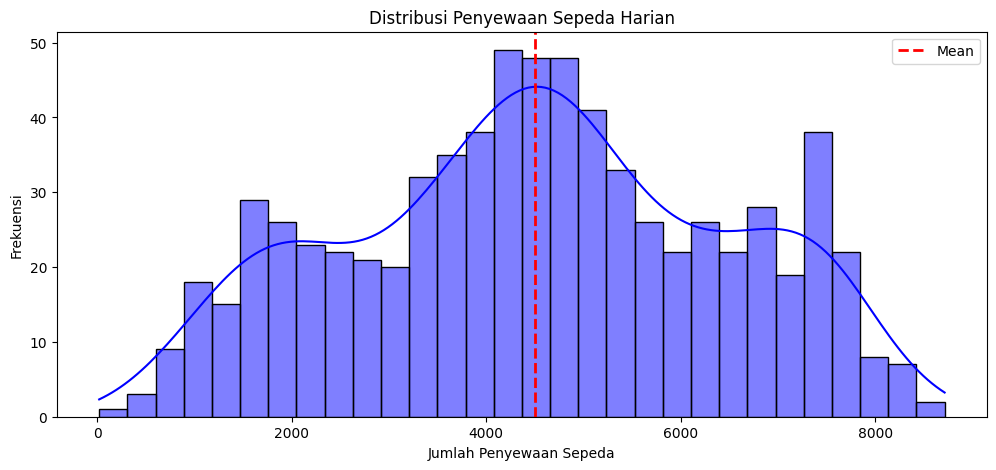

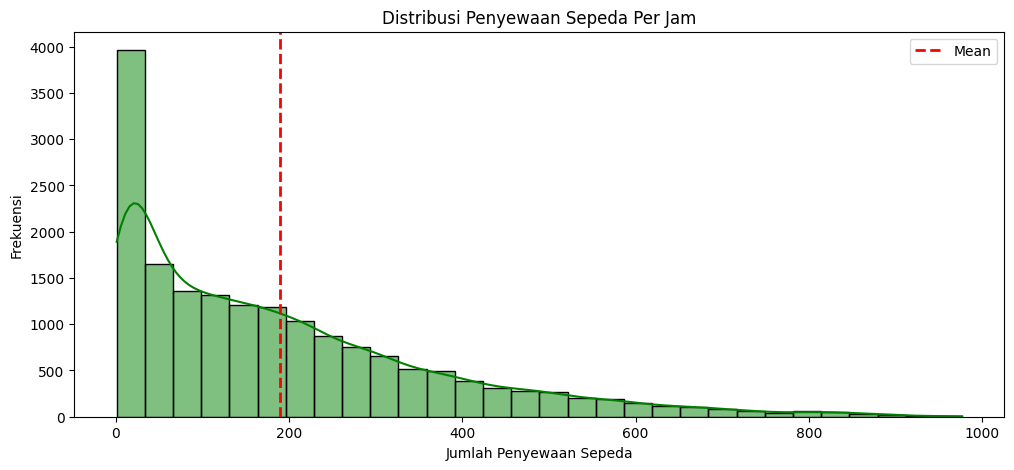

<ipython-input-9-3c6ee32fb00b>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df_day.groupby("season")["cnt"].mean().reset_index()
<ipython-input-9-3c6ee32fb00b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")


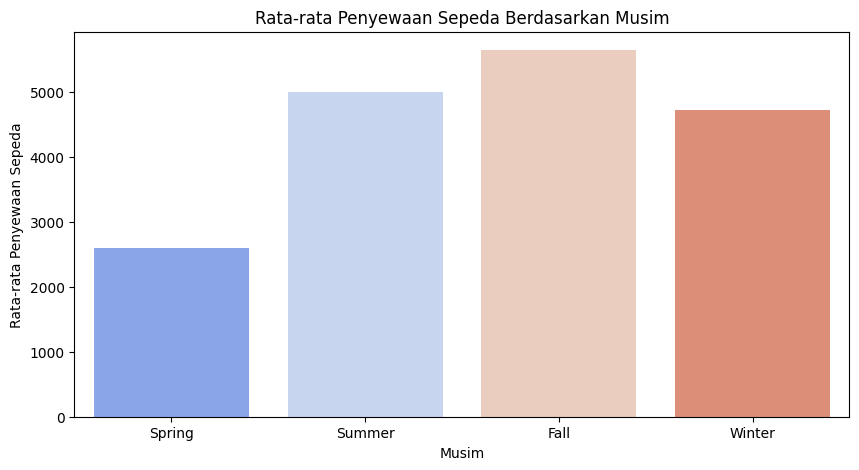

<ipython-input-9-3c6ee32fb00b>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = df_day.groupby("weathersit")["cnt"].mean().reset_index()
<ipython-input-9-3c6ee32fb00b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette="magma")


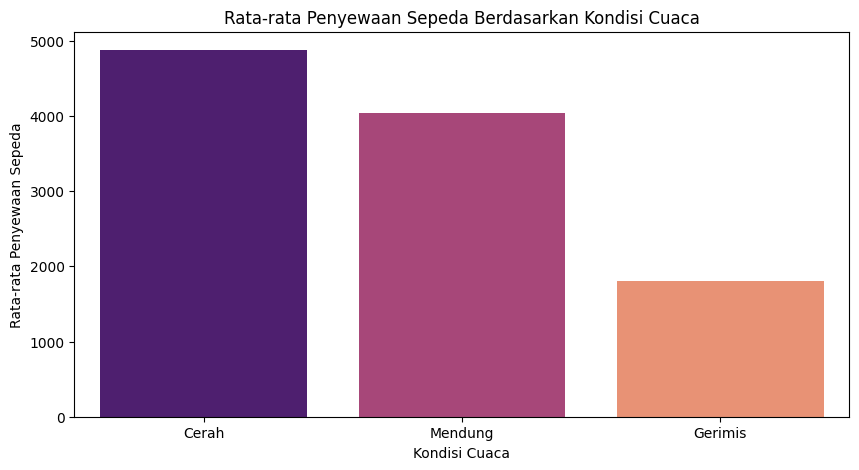

In [9]:
### 1. Distribusi Penyewaan Sepeda ###
plt.figure(figsize=(12, 5))
sns.histplot(df_day["cnt"], bins=30, kde=True, color="blue")
plt.axvline(df_day["cnt"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_hour["cnt"], bins=30, kde=True, color="green")
plt.axvline(df_hour["cnt"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.title("Distribusi Penyewaan Sepeda Per Jam")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

### 2. Faktor yang Mempengaruhi Penyewaan Sepeda ###
# a. Rata-rata Penyewaan Sepeda Berdasarkan Musim (Bar Chart)
plt.figure(figsize=(10, 5))
season_avg = df_day.groupby("season")["cnt"].mean().reset_index()
season_avg["season"] = season_avg["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

# b. Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Bar Chart)
plt.figure(figsize=(10, 5))
weather_avg = df_day.groupby("weathersit")["cnt"].mean().reset_index()
weather_avg["weathersit"] = weather_avg["weathersit"].map({1: "Cerah", 2: "Mendung", 3: "Gerimis", 4: "Hujan"})

sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette="magma")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

### Pertanyaan 2:

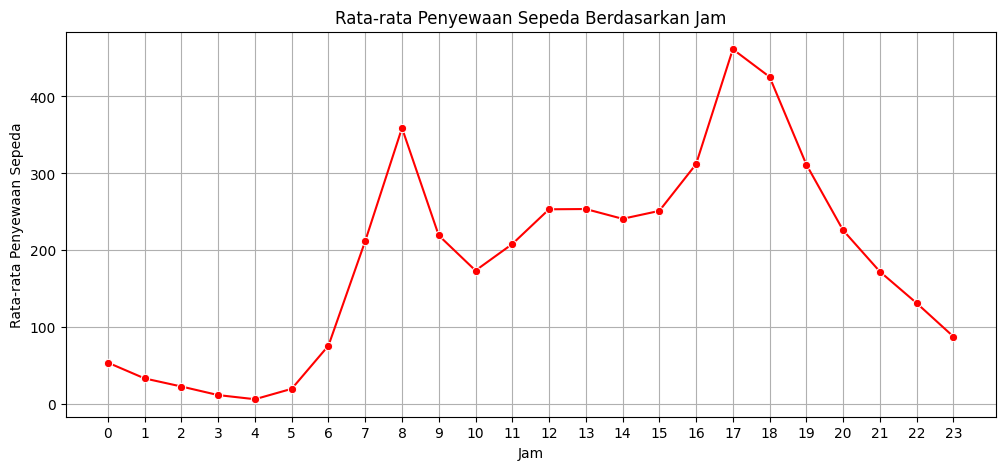

<ipython-input-10-a3c190e195e2>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_day.groupby("weekday")["cnt"].mean().reset_index()
<ipython-input-10-a3c190e195e2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=weekday_avg, palette="viridis")


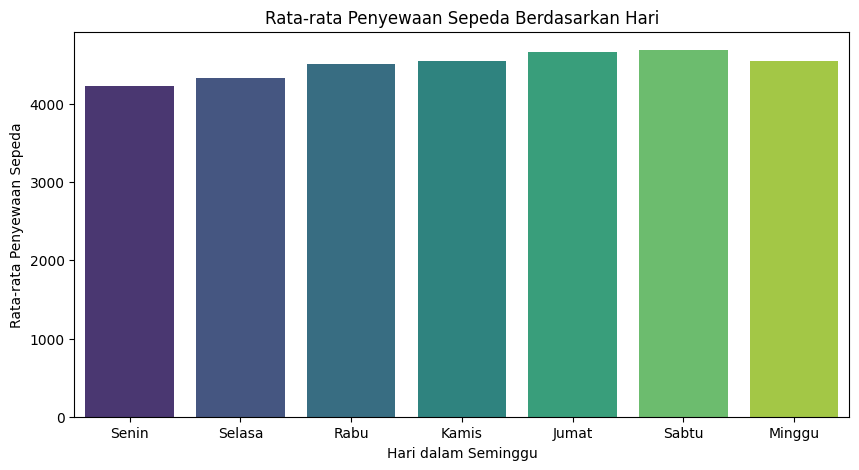

<ipython-input-10-a3c190e195e2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rush_hour", y="cnt", data=rush_hour_avg, palette="plasma")


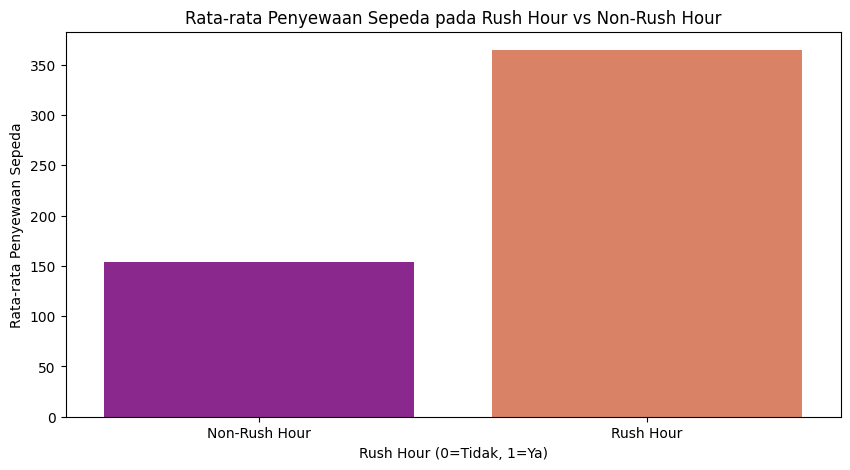

In [10]:
### 2. Waktu Terbaik untuk Penyewaan Sepeda ###
# a. Rata-rata Penyewaan Berdasarkan Jam (Line Chart)
plt.figure(figsize=(12, 5))
df_hour_avg = df_hour.groupby("hr")["cnt"].mean().reset_index()

sns.lineplot(x="hr", y="cnt", data=df_hour_avg, marker="o", color="red")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# b. Penyewaan Sepeda Berdasarkan Hari dalam Seminggu (Bar Chart)
plt.figure(figsize=(10, 5))
weekday_avg = df_day.groupby("weekday")["cnt"].mean().reset_index()
weekday_avg["weekday"] = weekday_avg["weekday"].map({0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 4: "Jumat", 5: "Sabtu", 6: "Minggu"})

sns.barplot(x="weekday", y="cnt", data=weekday_avg, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()

# c. Identifikasi Jam Sibuk (Rush Hour) (Bar Chart)
plt.figure(figsize=(10, 5))
rush_hour_avg = df_hour.groupby("rush_hour")["cnt"].mean().reset_index()

sns.barplot(x="rush_hour", y="cnt", data=rush_hour_avg, palette="plasma")
plt.title("Rata-rata Penyewaan Sepeda pada Rush Hour vs Non-Rush Hour")
plt.xlabel("Rush Hour (0=Tidak, 1=Ya)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(ticks=[0, 1], labels=["Non-Rush Hour", "Rush Hour"])
plt.show()

**Insight:**
- Visualisasi menunjukkan bahwa penyewaan sepeda harian memiliki distribusi normal, sedangkan penyewaan per jam lebih bervariasi. Faktor eksternal seperti musim dan kondisi cuaca sangat memengaruhi jumlah penyewaan, dengan musim panas dan cuaca cerah menunjukkan angka tertinggi. Sebaliknya, hujan dan musim dingin menyebabkan penurunan penyewaan yang signifikan.
- Penyewaan sepeda mencapai puncaknya pada jam sibuk pagi (07:00-08:00) dan sore (17:00-18:00), yang menunjukkan pola penggunaan untuk keperluan komuter. Akhir pekan memiliki distribusi penyewaan yang lebih merata dibandingkan hari kerja, di mana lonjakan lebih jelas terlihat pada jam kerja.

## Analisis Lanjutan (Opsional)

<ipython-input-16-b6a5f3228fba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_day["workingday"], y=df_day["cnt"], palette="coolwarm")


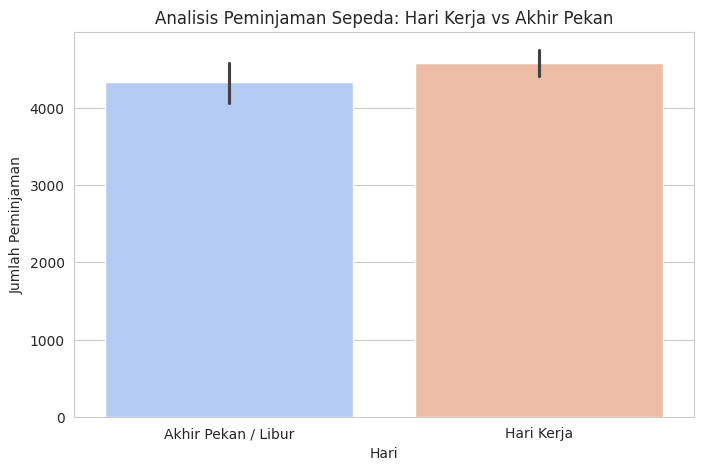

<ipython-input-16-b6a5f3228fba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_day["holiday"], y=df_day["cnt"], palette="coolwarm")


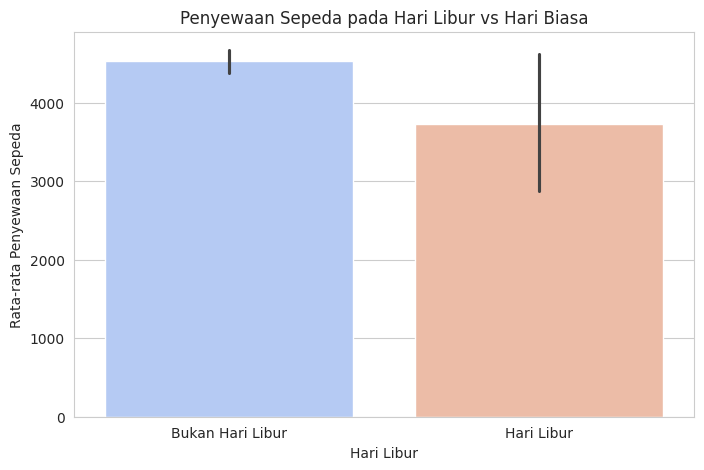

In [ ]:
# Analisis rata-rata penyewaan sepeda berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.barplot(x=df_day["workingday"], y=df_day["cnt"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan / Libur", "Hari Kerja"])
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman")
plt.title("Analisis Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()


# Analisis rata-rata penyewaan sepeda pada hari libur
plt.figure(figsize=(8, 5))
sns.barplot(x=df_day["holiday"], y=df_day["cnt"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Bukan Hari Libur", "Hari Libur"])
plt.xlabel("Hari Libur")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Penyewaan Sepeda pada Hari Libur vs Hari Biasa")
plt.show()

## Conclusion

- Musim dan kondisi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Penyewaan tertinggi terjadi pada musim panas dan gugur, sedangkan musim dingin menunjukkan penurunan. Cuaca yang cerah atau berawan ringan meningkatkan penyewaan, sementara hujan dan kabut menurunkannya drastis. Oleh karena itu, optimalisasi jumlah sepeda sebaiknya dilakukan saat musim panas dan kondisi cuaca mendukung.
- Penyewaan sepeda mencapai puncaknya pada pagi (07:00-09:00) dan sore hari (17:00-19:00), sesuai dengan jam kerja. Pada akhir pekan, pola penyewaan lebih merata tanpa lonjakan signifikan. Strategi bisnis dapat difokuskan pada peningkatan ketersediaan sepeda saat jam sibuk serta promosi khusus di akhir pekan untuk menarik pengguna rekreasi.